In [1]:
%pylab inline
import pandas as pd

rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

import NaiveDE
import SpatialDE
import scanpy as sc
from scipy.sparse import csr_matrix

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [9]:
saving_path=r'../../data/processed_adata/'
adata=sc.read('../../data/processed_adata/adata_msbrain_3rep_withclusters_only_nuclei_deep_annotation_with_colors.h5ad')

In [10]:
adata

AnnData object with n_obs × n_vars = 82941 × 284
    obs: 'ind', 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'graph_clusters', 'kmeans2_clusters', 'kmeans3_clusters', 'kmeans4_clusters', 'kmeans5_clusters', 'kmeans6_clusters', 'kmeans7_clusters', 'kmeans8_clusters', 'kmeans9_clusters', 'kmeans10_clusters', 'replicate', 'n_counts', 'leiden_2_2', 'leiden_1_8', 'leiden_1_4', 'leiden_1_0', 'leiden_0_8', 'leiden_0_6', 'cell_code', 'expanded_class', 'expanded_initial_annotation', 'Class', 'initial_annotation', 'celltype_annotation', 'X', 'Y', 'leiden_0_4', 'leiden_0_2', 'Class_old', 'class_number'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Class_colors', 'celltype_annotation_colors', 'dendrogram_celltype_annotation', 'dendrogram_initial_annotation', 'expanded_class_colors', 'expanded_initial_annotation_colors', 'hvg', 'initial_annotation_colors

In [11]:
adata.X=adata.layers['raw']
adata1=adata[adata.obs['replicate']=='1']
import random
some=random.sample(range(0,adata1.shape[0]),5000)
adata1=adata1[some,:]

In [12]:
counts=pd.DataFrame(adata1.X.toarray(),columns=adata1.var.index)

In [13]:
print(counts.shape)

(5000, 284)


In [14]:
sample_info = adata1.obs
sample_info=sample_info.reset_index()
counts = counts.loc[sample_info.index]  # Align count matrix with metadata table
sample_info.head(5)

,index,ind,cell_id,x_centroid,y_centroid,transcript_counts,control_probe_counts,control_codeword_counts,total_counts,cell_area,...,expanded_initial_annotation,Class,initial_annotation,celltype_annotation,X,Y,leiden_0_4,leiden_0_2,Class_old,class_number
0,25652,25663,25663,2885.686523,2832.696045,59,0,0,25.0,230.748437,...,10_Astro,Astro,Astro2,Astro2,13579.694497,13330.327664,1,1,Astro,1_Astro
1,3618,3625,3625,110.287857,733.980652,43,0,0,28.0,39.963281,...,21_Ependymal,Astro,Ependymal,Ependymal,519.001421,3454.024870,14,1,Ependymal,1_Astro
2,33,34,34,664.681946,858.590637,282,0,0,12.0,906.692344,...,11_CA3_inconsistent,Astro,Astro1,Astro1,3127.913475,4040.424508,1,1,Astro,1_Astro
3,5981,5988,5988,179.832840,2466.149170,301,0,0,137.0,323.092969,...,6_L6 CT CTX,Excitatory,L6 CT Syt6,L6 CT Syt6,846.271765,11605.402056,3,7,Excitatory,7_Excitatory
4,10385,10392,10392,1043.162109,428.717651,452,0,0,180.0,586.128125,...,18_CP,CP,CP,CP,4908.995707,2017.493821,13,11,CP,11_CP


In [15]:
sample_info['x']=sample_info['X']
sample_info['y']=sample_info['Y']

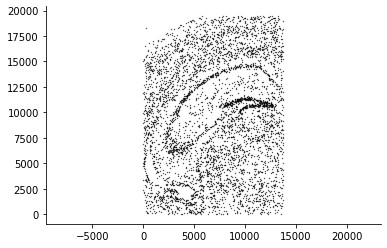

In [16]:
figsize(6, 4)
plt.scatter(sample_info['x'], sample_info['y'], c='k',s=0.1);
plt.axis('equal');

In [17]:
norm_expr = NaiveDE.stabilize(counts.T).T
resid_expr = NaiveDE.regress_out(sample_info, norm_expr.T, 'np.log(total_counts)').T

/home/sergioms/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [18]:
X = sample_info[['x', 'y']]
results = SpatialDE.run(X, resid_expr)

/home/sergioms/.local/lib/python3.8/site-packages/SpatialDE/base.py:26: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  R2 = -2. * np.dot(X, X.T) + (Xsq[:, None] + Xsq[None, :])
/home/sergioms/.local/lib/python3.8/site-packages/SpatialDE/base.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  R2 = -2. * np.dot(X, X.T) + (Xsq[:, None] + Xsq[None, :])
 50%|████████████████████████████████████████▊                                        | 143/284 [00:02<00:02, 67.00it/s]


 12%|██████████                                                                        | 35/284 [00:00<00:03, 81.06it/s]/home/sergioms/.local/lib/python3.8/site-packages/SpatialDE/base.py:178: RuntimeWarning: divide by zero encountered in double_scalars
  s2_logdelta = 1. / (derivative(LL_obj, np.log(max_delta), n=2) ** 2)

 28%|███████████████████████                                                           | 80/284 [00:00<00:02, 80.98it/s]


 20%|████████████████▋                                                                 | 58/284 [00:00<00:02, 78.92it/s]


 99%|████████████████████████████████████████████████████████████████████████████████▏| 281/284 [00:04<00:00, 66.24it/s]


 55%|████████████████████████████████████████████▏                                    | 155/284 [00:02<00:01, 64.65it/s]


Models: 100%|███████████████████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.07s/it]


In [19]:
results.index=results['g']
results.index.name='index'
results.to_csv('../../figures/tables/spatialDE_scores_nuclei_rep1.csv')